# Machine Learning - Cardio disease diagnosis model
## NBC, KNN, and Ensemble Learning

#### * By using multiple machine learning algorithms, including naive Bayes classifier, K Nearest Neighbor, Random Forest and Gradient Boosting Classifier, build a disease diagnosis model. 
#### * It is a binary classification problem to predict whether or not a patient has a certain unspecified disease.



## < Section 1: Data preparation >

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
from scipy.spatial import distance_matrix
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

In [5]:
# Import training dataset

Cardio = pd.read_csv('~/Desktop/Disease Prediction Training.csv') 
Cardio.head()

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease
0,59,female,167,88.0,130,68,normal,normal,0,0,1,0
1,64,female,150,71.0,140,100,normal,normal,0,0,0,1
2,41,female,166,83.0,100,70,normal,normal,0,1,1,0
3,50,male,172,110.0,130,80,normal,normal,1,0,1,0
4,39,female,162,61.0,110,80,high,high,0,0,1,0


In [6]:
# Get a general info of the train data

def describe_data(Cardio):
    print("Data Types:")
    print(Cardio.dtypes)
    print("Rows and Columns:")
    print(Cardio.shape)
    print("Column Names:")
    print(Cardio.columns)
    
describe_data(Cardio)

Data Types:
Age                      int64
Gender                  object
Height                   int64
Weight                 float64
High Blood Pressure      int64
Low Blood Pressure       int64
Cholesterol             object
Glucose                 object
Smoke                    int64
Alcohol                  int64
Exercise                 int64
Disease                  int64
dtype: object
Rows and Columns:
(49000, 12)
Column Names:
Index(['Age', 'Gender', 'Height', 'Weight', 'High Blood Pressure',
       'Low Blood Pressure', 'Cholesterol', 'Glucose', 'Smoke', 'Alcohol',
       'Exercise', 'Disease'],
      dtype='object')


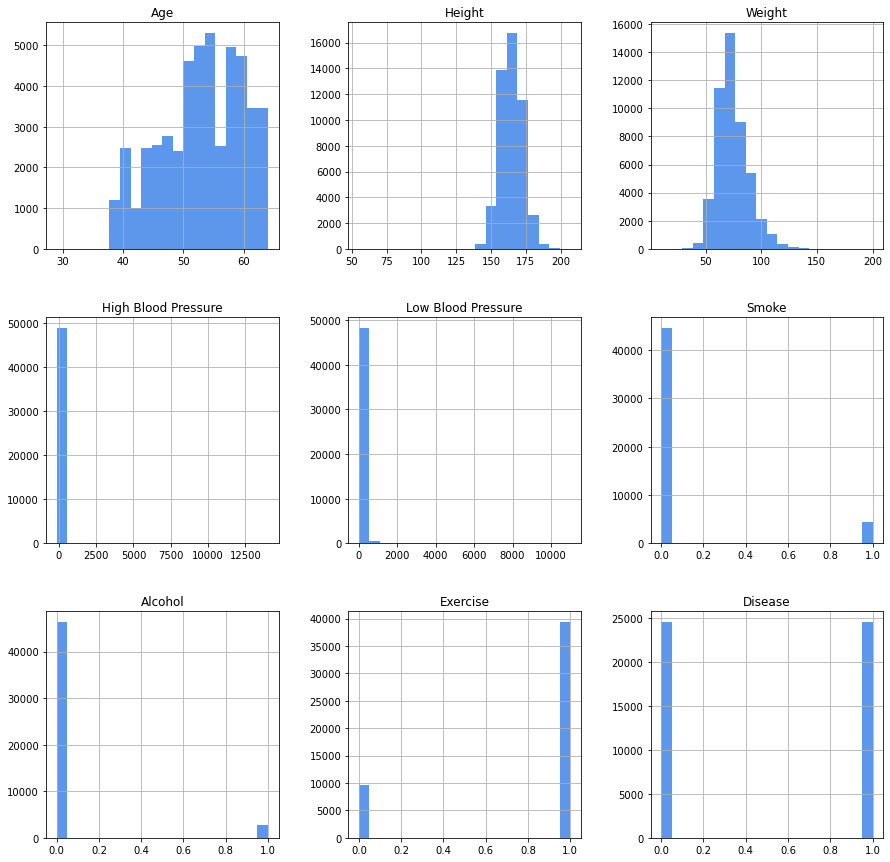

In [7]:
# Visualize the data with histograms

Cardio.hist(bins=20, figsize = (15,15), color = '#5c97eb');

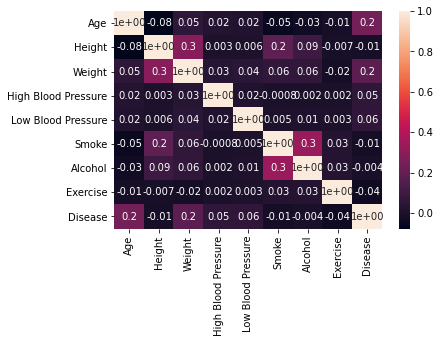

In [9]:
# Correlation plot with heatmap

Cardio.corr()
ax = sns.heatmap(Cardio.corr(), annot=True, fmt='.0')

In [69]:
# Correlation matrix 

corr_matrix = Cardio.corr()
corr_matrix

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease
Age,1.000000,-0.019193,-0.077621,0.054611,0.024186,0.015983,0.079821,0.043590,-0.050065,-0.028419,-0.011579,0.239784
Gender,-0.019193,1.000000,0.500359,0.156689,0.006312,0.017257,-0.003860,-0.008606,0.335863,0.168043,0.006511,0.010288
Height,-0.077621,0.500359,1.000000,0.291676,0.002917,0.005524,-0.006621,0.003794,0.186391,0.093549,-0.007061,-0.011022
Weight,0.054611,0.156689,0.291676,1.000000,0.031973,0.041933,0.024227,-0.020111,0.063138,0.061883,-0.017145,0.181836
High Blood Pressure,0.024186,0.006312,0.002917,0.031973,1.000000,0.016065,0.003096,-0.000549,-0.000820,0.001555,0.002153,0.053667
Low Blood Pressure,0.015983,0.017257,0.005524,0.041933,0.016065,1.000000,-0.003793,-0.009111,0.005267,0.012807,0.002568,0.060944
Cholesterol,0.079821,-0.003860,-0.006621,0.024227,0.003096,-0.003793,1.000000,0.365119,-0.016246,-0.016022,0.014680,0.061993
Glucose,0.043590,-0.008606,0.003794,-0.020111,-0.000549,-0.009111,0.365119,1.000000,-0.019376,-0.020964,0.009080,0.011279
Smoke,-0.050065,0.335863,0.186391,0.063138,-0.000820,0.005267,-0.016246,-0.019376,1.000000,0.337435,0.026082,-0.014579
Alcohol,-0.028419,0.168043,0.093549,0.061883,0.001555,0.012807,-0.016022,-0.020964,0.337435,1.000000,0.026081,-0.004486


In [10]:
# Encode 3 object variables to numeric

from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

Cardio['Gender'] = number.fit_transform(Cardio['Gender'].astype(str))
Cardio['Cholesterol'] = number.fit_transform(Cardio['Cholesterol'].astype(str))
Cardio['Glucose'] = number.fit_transform(Cardio['Glucose'].astype(str))

In [11]:
# Make sure all values are numeric

Cardio.head()

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,Disease
0,59,0,167,88.0,130,68,1,1,0,0,1,0
1,64,0,150,71.0,140,100,1,1,0,0,0,1
2,41,0,166,83.0,100,70,1,1,0,1,1,0
3,50,1,172,110.0,130,80,1,1,1,0,1,0
4,39,0,162,61.0,110,80,0,0,0,0,1,0




## < Section 2: Build, tune and evaluate various machine learning algorithms >

Text(0.5, 1.0, 'Elbow Method for Optimal K-value')

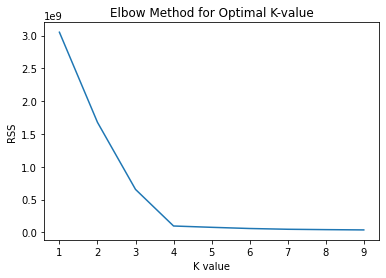

In [12]:
# K Nearest Neighbor with Elbow method

from sklearn.cluster import KMeans

ssd = []
k_range = range(1,10)
for k in k_range:
    KM = KMeans(n_clusters=k)
    KM.fit(Cardio[['Age','Gender','Height','Weight','High Blood Pressure','Low Blood Pressure', 
                    'Cholesterol','Glucose','Smoke','Alcohol','Exercise']])
    ssd.append(KM.inertia_)

plt.xlabel('K value')
plt.ylabel('RSS')
plt.plot(k_range, ssd)
plt.title('Elbow Method for Optimal K-value')

It is clear that the elbow method suggests k = 4.

In [25]:
# Preprocessing - Remove null values

Cardio.isnull().sum(axis=0)

Age                    0
Gender                 0
Height                 0
Weight                 0
High Blood Pressure    0
Low Blood Pressure     0
Cholesterol            0
Glucose                0
Smoke                  0
Alcohol                0
Exercise               0
Disease                0
dtype: int64

No null values were found!

In [26]:
# Train the model

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

X = Cardio.drop('Disease', axis=1)
y = Cardio['Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
# Fit the models

from sklearn.neighbors import KNeighborsClassifier

classifiers = list()

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.fit(X_train, y_train)
pred_kmean = knn.predict(X_test)

In [49]:
# Gradiet Boosting Classifier

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

# Applying the model to the X_test

pred_GBC = GBC.predict(X_test)

In [50]:
# Accuracy score of Boosting Classifier

GBCAS = accuracy_score(y_test, pred_GBC)*100
GBCAS

74.12244897959184

In [51]:
# Naive Bayes Classification

from sklearn.naive_bayes import GaussianNB

NBC = GaussianNB()
NBC.fit(X_train, y_train)
pred_NBC = NBC.predict(X_test)

In [52]:
# Accuracy score of NBC

NBCAS = accuracy_score(y_test, pred_NBC)*100
NBCAS

60.3265306122449

In [53]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=1234)
RF.fit(X_train, y_train)
pred_RF = RF.predict(X_test)

In [54]:
# Accuracy score of Random Forest

RFAS = accuracy_score(y_test, pred_RF)*100
RFAS

71.26530612244898

In [56]:
# Accuracy score of KNN

KNNAS = accuracy_score(y_test, pred_kmean)*100
KNNAS

69.01020408163265

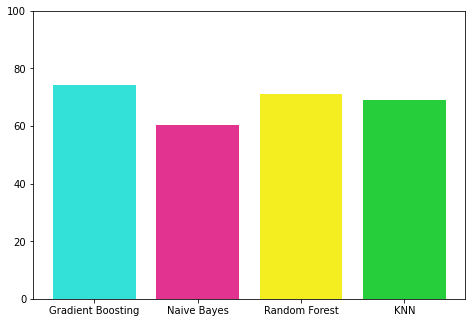

In [40]:
# Visualize the comparison of classifiers' accuracy scores

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

Cname = ['Gradient Boosting', 'Naive Bayes', 'Random Forest', 'KNN']
Cvalue = [74.12, 60.33, 71.27, 69.01]
ax.bar(Cname, Cvalue, color=['#33e1d8', '#e1338f', '#f4ed1f', '#27ce3b'])
plt.ylim(0, 100)
plt.show()

By Comparing classifiers as bove plot, I found out that Gradient Boosting has the highest accuracy score = 74%, followed by Random Forest = 71%.

In [11]:
# Import test dataset

Ctest = pd.read_csv('~/Desktop/Disease Prediction Testing.csv')
Ctest.head()

,ID,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise
0,0,44,female,160,59.0,100,80,high,normal,0,0,1
1,1,41,female,169,74.0,120,70,normal,normal,0,0,1
2,2,63,male,168,84.0,120,80,normal,high,0,0,1
3,3,55,female,158,108.0,160,100,normal,normal,0,0,0
4,4,55,female,167,67.0,120,80,normal,normal,0,0,1


In [12]:
# Drop 'ID' column

Ctest_id = Ctest['ID']
Ctest = Ctest.drop(columns=['ID'])

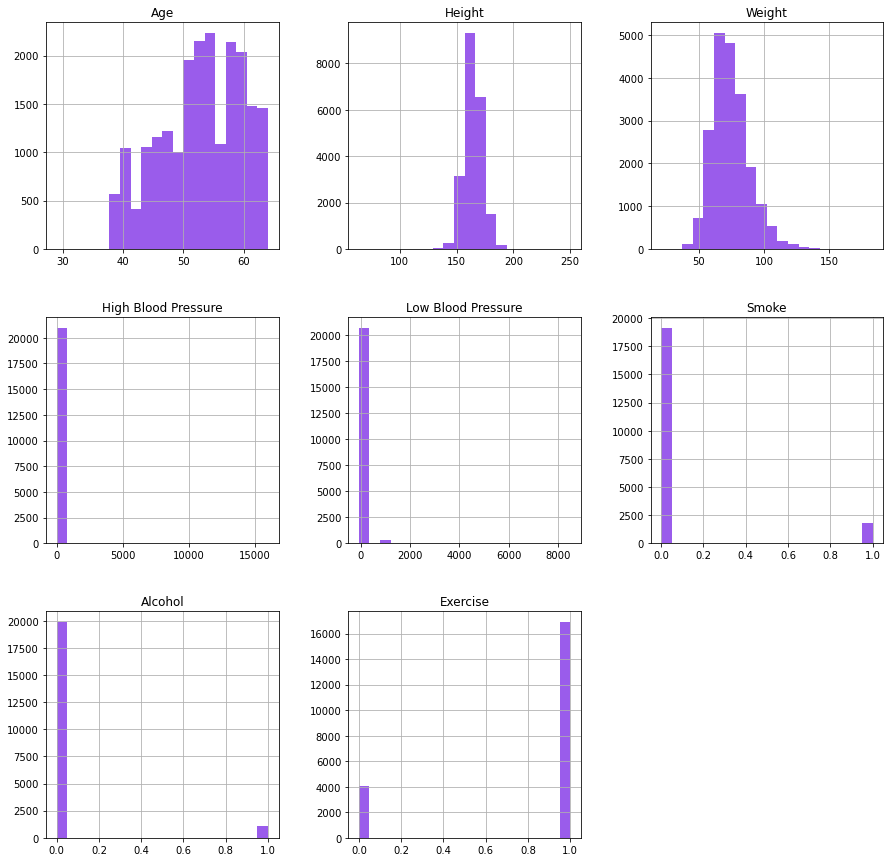

In [13]:
# Visualize the data with histograms

Ctest.hist(bins=20, figsize = (15,15), color = '#9a5ceb');

In [46]:
# Encode Gender from object to numeric

from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()

Ctest['Gender'] = number.fit_transform(Ctest['Gender'].astype(str))
Ctest['Cholesterol'] = number.fit_transform(Ctest['Cholesterol'].astype(str))
Ctest['Glucose'] = number.fit_transform(Ctest['Glucose'].astype(str))

In [63]:
# Find the prediction values for test data with each classifiers

pred_tGBC = GBC.predict(Ctest)
pred_tNBC = NBC.predict(Ctest)
pred_tRFC = RF.predict(Ctest)
pred_tKmeans = knn.predict(Ctest)

In [62]:
Ctest_id

0            0
1            1
2            2
3            3
4            4
         ...  
20995    20995
20996    20996
20997    20997
20998    20998
20999    20999
Name: ID, Length: 21000, dtype: int64

In [66]:
# Create a new dataset with the prediction columns then export it as csv file

CardioDiseaseNew = pd.DataFrame(Ctest)

CardioDiseaseNew['GBC'] = pred_tGBC
CardioDiseaseNew['NBC'] = pred_tNBC
CardioDiseaseNew['RFC'] = pred_tRFC
CardioDiseaseNew['Knn'] = pred_tKmeans
CardioDiseaseNew['ID'] = Ctest_id

CardioDiseaseNew.head()

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,GBC,NBC,RFC,Knn,ID
0,44,0,160,59.0,100,80,0,1,0,0,1,0,0,0,0,0
1,41,0,169,74.0,120,70,1,1,0,0,1,0,0,0,0,1
2,63,1,168,84.0,120,80,1,0,0,0,1,1,1,1,1,2
3,55,0,158,108.0,160,100,1,1,0,0,0,1,1,1,1,3
4,55,0,167,67.0,120,80,1,1,0,0,1,0,0,0,1,4


In [67]:
# Convert Gender, Cholesterol, Glucose values back to object

CardioDiseaseNew['Gender'] = CardioDiseaseNew['Gender'].map({0:'male', 1:'female'})
CardioDiseaseNew['Cholesterol'] = CardioDiseaseNew['Cholesterol'].map({0:'normal', 1:'high', 2:'too high'})
CardioDiseaseNew['Glucose'] = CardioDiseaseNew['Glucose'].map({0:'normal', 1:'high', 2:'too high'})

CardioDiseaseNew.head()

,Age,Gender,Height,Weight,High Blood Pressure,Low Blood Pressure,Cholesterol,Glucose,Smoke,Alcohol,Exercise,GBC,NBC,RFC,Knn,ID
0,44,male,160,59.0,100,80,normal,high,0,0,1,0,0,0,0,0
1,41,male,169,74.0,120,70,high,high,0,0,1,0,0,0,0,1
2,63,female,168,84.0,120,80,high,normal,0,0,1,1,1,1,1,2
3,55,male,158,108.0,160,100,high,high,0,0,0,1,1,1,1,3
4,55,male,167,67.0,120,80,high,high,0,0,1,0,0,0,1,4


In [68]:
# Store the new dataframe as csv file

CardioDiseaseNew.to_csv('~/Desktop/Disease Prediction NEW.csv')



## < Section 3: Prediction and interpretation >

In this assignment, I predicted whether the patients have the disease or not by using algorithms we have learned throughout the late fall 2020 semester, such as Naive Bayes classifier, K Nearest Neighbor, Random Forest and Gradient Boosting Classifier. There are three major parts in this report: 1. Data preparation, 2. Model building and evaluation, then 3. Prediction and interpretation. 

At the data preparation part, I started identifying data types, column names, and the target variable which is "Disease". The correlation analysis shows that "Disease" has strong positive correlations with "Age" and "Weight" particularly. This means that the disease occurrance is highly impacted by "Age" and "weight", more specifically, older and heavier patients are more likely to have the disease.
One important step before model building is to encode object variables to numerical in order to construct a better model.

The first algorithm I used was K Nearest Neighbor (KNN). This method is helpful to classify new cases. I used the Elbow method to find out the optimal K value, which turned out 4. The model resulted the accuracy score of 69% with KNN. The next method I applied was Gradient Boosting Classifier, which gave me the accuracy score of 74%, which is the highest accuracy score among all classifiers I tried. Naive Bayes Classifier gave me the accuracy score result of 60%, which is the lowest accuracy score I got among other classifiers. Random Forest derived the accuracy score of 71%, which is the second highest accuracy score.
1. Gradient Boosting Classifier (74%)
2. Random Forest (71%)
3. KNN (69%)
4. Naive Bayes Classifier (60%)

After predicting the disease occurrance, I created new columns for the disease occurrance binary resuts with those classifiers. I converted some variables back to numeric in order to make the new data set compartible as the testing data set had, including "ID" column.
